# Question3

## Data Samples Generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
list_x=[]
list_y=[]
list_train=[]
#generate data points 
for i in range(21):
    list_x.append(-2+0.2*i)
    list_y.append(-2+0.2*i)
#generate all combinations
for i in range(21):
    for j in range (21):
        list_train.append((list_x[i],list_y[j]))
#randomly choose 441 sampled data points 
random_sample=[]
for i in range(441):
    index=np.random.randint(low=0, high=441, size=1)
    random_sample.append(list_train[index[0]])
train_data=np.array(random_sample)
#split training and testing data using spliting ratio 4:1 
training_data=train_data[0:353,:]
testing_data=train_data[353:,:]
#generate labels for all samples
label=[]
for i in range(441):
    if (((train_data[i][0])**2+(train_data[i][1])**2)<=1):
        label.append(1)
    else:
        label.append(-1)
#split training labels and testing labels using spliting ratio 4:1 
labels=np.array(label)
training_labels=labels[0:353]
testing_labels=labels[353:]

## (1) Use 353 RBF NN centers and compare the performance results (mean square error) when the spread parameter sigma=0.5, 2.1, 8.5

sigma= 0.5 training_MSE= 0.0 training_accuracy= 1.0 testing_accuracy= 0.8864
sigma= 2.1 training_MSE= 0.034 training_accuracy= 0.9915 testing_accuracy= 0.9773
sigma= 8.5 training_MSE= 0.068 training_accuracy= 0.983 testing_accuracy= 0.9773


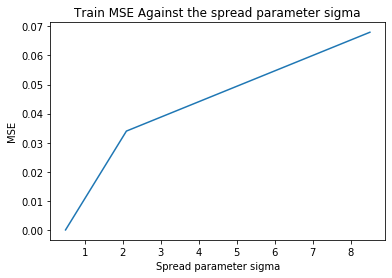

In [2]:
#three different spread paramater sigmas  
sigma=[0.5,2.1,8.5]
accuracy_list_test=[]
accuracy_list_train=[]
mse_list_train=[]
for h in range(len(sigma)):
    G=[]
#using 353 trainng data point as centers of RB functions
    for i in range(training_data.shape[0]):
        g=[]
#go through all data training data samples        
        for j in range(training_data.shape[0]):
#calculate the distance bewteen data point and center
            dif=np.linalg.norm(training_data[j] - training_data[i])
#build up G matrix based on training data 
            g.append(np.exp(-(dif)**2/2/sigma[h]**2))
        G.append(g)
    G_matrix=np.array(G)
#calculate the  pseudo-inverse matrix of G 
    G_plus=np.linalg.pinv(G_matrix)
#calculate the weight between hidden layer and outputlayer
    w=np.dot(G_plus,training_labels)
#predict the output 
    pre0=np.sign(np.dot(G_matrix.T,w))
#calculate the accuracy of training data
    corr0 = 0
    for i in range(0,len(training_labels)):
        corr0 += 1 if (training_labels[i] == pre0[i]).all() else 0
    accuracy_list_train.append(corr0/len(training_labels))
#calculate the mse of the training data
    mse0 = (np.square(pre0 - training_labels)).mean(axis=0)
    mse_list_train.append(mse0)
#builid up the G matrix for the testing data
    G_test=[]
    for i in range(training_data.shape[0]):
        g_test=[]
        for j in range(testing_data.shape[0]):
            dif_test=np.linalg.norm(testing_data[j] - training_data[i])
            g_test.append(np.exp(-(dif_test)**2/2/sigma[h]**2))
        G_test.append(g_test)
    G_matrix_test=np.array(G_test)
#use the weight calculated from training data and G_testing_data to predict for testing data
    pre=np.sign(np.dot(G_matrix_test.T,w))
#calculate the accuracy of testing data
    corr = 0
    for i in range(0,len(testing_labels)):
        corr += 1 if (testing_labels[i] == pre[i]).all() else 0
    accuracy_list_test.append(corr/len(testing_labels))
    print("sigma=",sigma[h],"training_MSE=",round(mse0,4),"training_accuracy=",round(corr0/len(training_labels),4),"testing_accuracy=",round(corr/len(testing_labels),4))
#show the mse graph of three different sigma
plt.title('Train MSE Against the spread parameter sigma')
plt.xlabel("Spread parameter sigma")
plt.ylabel("MSE")
l1=plt.plot(sigma,mse_list_train,'-',label='type3')

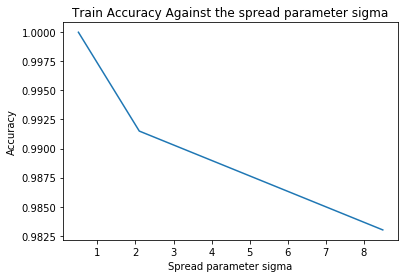

In [3]:
#show the graph for training accuracy for three different sigma
plt.title('Train Accuracy Against the spread parameter sigma')
plt.xlabel("Spread parameter sigma")
plt.ylabel("Accuracy")
l2=plt.plot(sigma,accuracy_list_train,'-',label='type3')

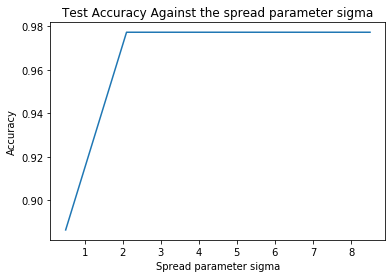

In [4]:
#show the graph for testing accuracy for three different sigma
plt.title('Test Accuracy Against the spread parameter sigma')
plt.xlabel("Spread parameter sigma")
plt.ylabel("Accuracy")
l2=plt.plot(sigma,accuracy_list_test,'-',label='type3')

## (2) Chose sigma = 2.1, compute the results of randomly selecting 150 centers RBF and K-mean 150 centers RBF

In [5]:
#use two different selecting approach: randomly select 150 centers and use K_means to select 150 centers
approach=["Randomly select 150","Kmean to find 150"]
accuracy_list_train1=[]
accuracy_list_test1=[]
mse_list_train1=[]
random_sample_150=[]
#randomly select 150 datapoints as centers 
for i in range(150):
    index_150=np.random.randint(low=0, high=150, size=1)
    random_sample_150.append(list_train[index_150[0]])
center1_150=np.array(random_sample_150)
#use K_means to select 150 datapoints as centers 
kmeans = KMeans(n_clusters=150, random_state=1).fit(train_data)
kmeansample=kmeans.cluster_centers_
center2_150=np.array(kmeansample)
#use fixed sigma=2.1 
sigma=2.1
#center1_150 is randomly selected centers, center2_150 is Kmean based centers
center_list=[center1_150,center2_150]
for h in range(len(center_list)):
    G_150=[]
    center_150=center_list[h]
#this time use 150 trainng data point as the centers of RB functions and the rest codes are similar to part1
    for i in range(center_150.shape[0]):
        g_150=[]
        for j in range(training_data.shape[0]):
            dif_150=np.linalg.norm(training_data[j] - center_150[i])
            g_150.append(np.exp(-(dif_150)**2/2/sigma**2))
        G_150.append(g_150)
    G_matrix_150=np.array(G_150)
    G_plus_150=np.linalg.pinv(G_matrix_150)
    
    w_150=np.dot(G_plus_150.T,training_labels)
    
    pre1=np.sign(np.dot(G_matrix.T,w))
    corr1 = 0
    for i in range(0,len(training_labels)):
        corr1 += 1 if (training_labels[i] == pre1[i]).all() else 0
    accuracy_list_train1.append(corr1/len(training_labels))
    mse1 = (np.square(pre1 - training_labels)).mean(axis=0)
    mse_list_train1.append(mse1)
      
    G_test_150=[]
    for i in range(center_150.shape[0]):
        g_test_150=[]
        for j in range(testing_data.shape[0]):
            dif_test_150=np.linalg.norm(testing_data[j] - center_150[i])
            g_test_150.append(np.exp(-(dif_test_150)**2/2/sigma**2))
        G_test_150.append(g_test_150)
    G_matrix_test_150=np.array(G_test_150)
    pre_150=np.sign(np.dot(G_matrix_test_150.T,w_150))
    corr2 = 0
    for i in range(0,len(testing_labels)):
        corr2 += 1 if (testing_labels[i] == pre_150[i]).all() else 0
    accuracy_list_test1.append(corr2/len(testing_labels))
    print(approach[h],"MSE:",round(mse1,4),"training_Accuracy:",round(corr1/len(training_labels),4),"Testing_Accuracy:",round(corr2/len(testing_labels),4))

Randomly select 150 MSE: 0.068 training_Accuracy: 0.983 Testing_Accuracy: 0.9659
Kmean to find 150 MSE: 0.068 training_Accuracy: 0.983 Testing_Accuracy: 0.9773


## Compare the MSE, training accuracy, and testing accuracy of 353 centers RBF from part 1 , randomly 150 centers RBF and K_mean 150 centers RBF

353 centers 0.034
Random_150 0.068
K_mean-150 0.068


Text(0, 0.5, 'MSE')

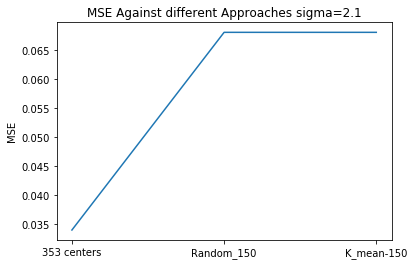

In [6]:
#plot the MSE of 353 center from part1, randomly 150 centers and 150 centers based on Kmean
mse_train_sigmafixed=[]
approach_name=['353 centers','Random_150','K_mean-150']
mse_train_sigmafixed.append(round(mse_list_train[1],3))
mse_train_sigmafixed.append(round(mse_list_train1[0],3))
mse_train_sigmafixed.append(round(mse_list_train1[1],3))
for i in range(len(mse_train_sigmafixed)):
    print(approach_name[i],mse_train_sigmafixed[i])
l3=plt.plot(approach_name,mse_train_sigmafixed,'-',label='type3')
plt.title('MSE Against different Approaches sigma=2.1')

plt.ylabel("MSE")

353centers 0.992
Random_150 0.983
K_mean-150 0.983


Text(0, 0.5, 'Accuracy')

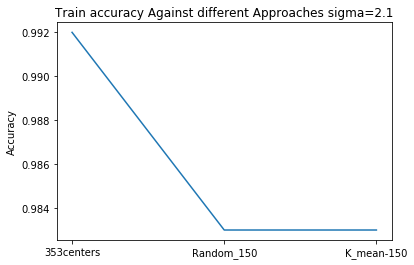

In [7]:
#plot the train_accuracy of 353 center from part1, randomly 150 centers and 150 centers based on Kmean
train_accuracy_sigmafixed=[]
approach_name=['353centers','Random_150','K_mean-150']
train_accuracy_sigmafixed.append(round(accuracy_list_train[1],3))
train_accuracy_sigmafixed.append(round(accuracy_list_train1[0],3))
train_accuracy_sigmafixed.append(round(accuracy_list_train1[1],3))
for i in range(len(train_accuracy_sigmafixed)):
    print(approach_name[i],train_accuracy_sigmafixed[i])
l4=plt.plot(approach_name,train_accuracy_sigmafixed,'-',label='type3')
plt.title('Train accuracy Against different Approaches sigma=2.1')
plt.ylabel("Accuracy")

353centers 0.977
Random_150 0.966
K_mean-150 0.977


Text(0.5, 1.0, 'Test accuracy Against different Approaches sigma=2.1')

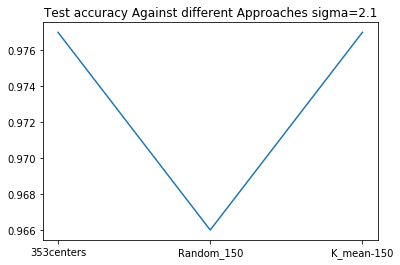

In [8]:
#plot the test_accuracy of 353 center from part1, randomly 150 centers and 150 centers based on Kmean
test_accuracy_sigmafixed=[]
approach_name=['353centers','Random_150','K_mean-150']
test_accuracy_sigmafixed.append(round(accuracy_list_test[1],3))
test_accuracy_sigmafixed.append(round(accuracy_list_test1[0],3))
test_accuracy_sigmafixed.append(round(accuracy_list_test1[1],3))
for i in range(len(test_accuracy_sigmafixed)):
    print(approach_name[i],test_accuracy_sigmafixed[i])
l5=plt.plot(approach_name,test_accuracy_sigmafixed,'-',label='type3')
plt.title('Test accuracy Against different Approaches sigma=2.1')